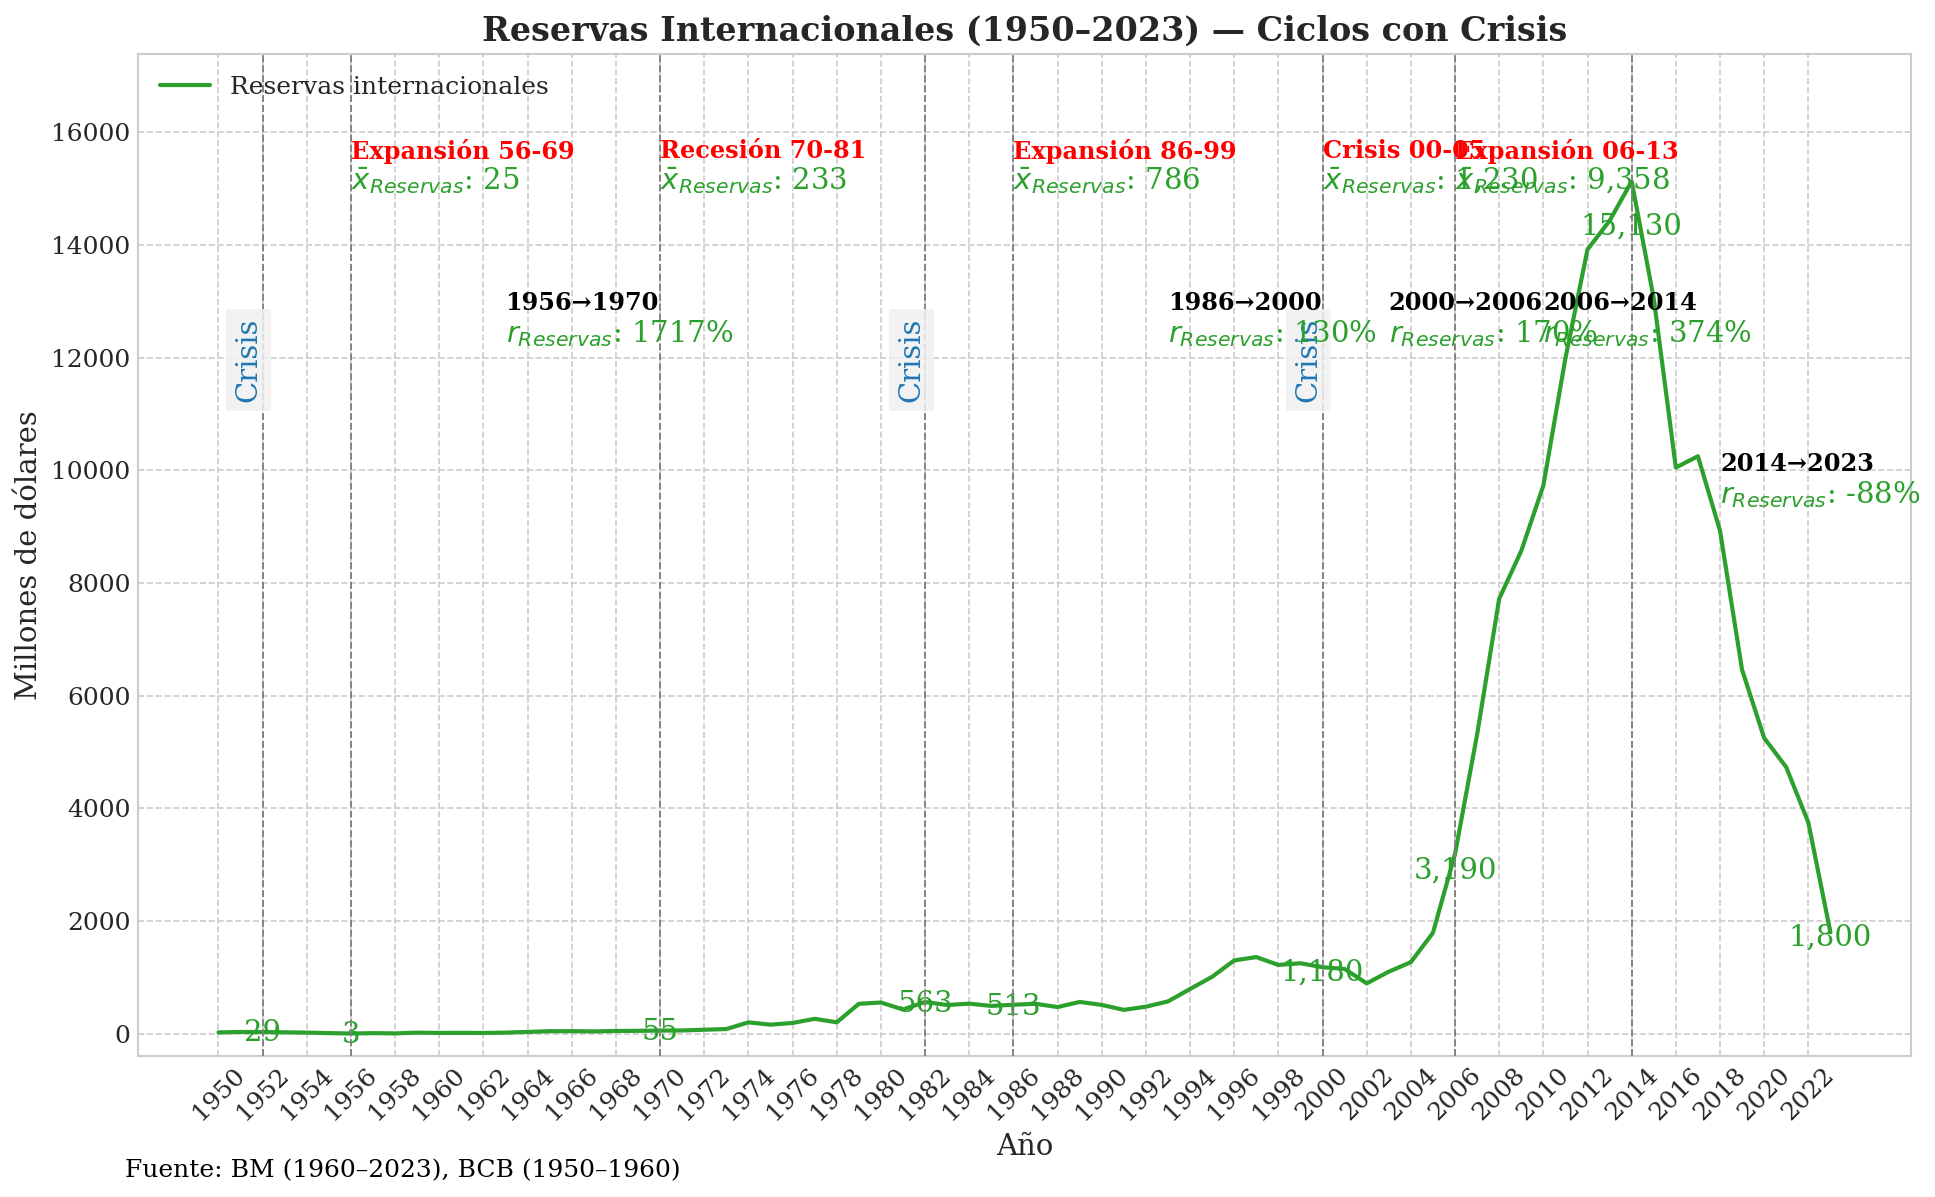

In [6]:
# ─────────────────────────────────────────────────────────────
# Importaciones comunes
# ─────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))  # utilidades propias
from graficos_utils import *
from config import (
    CYCLES, annot_years, periodos_tasas, hitos_v,
    CYCLES_SIN_CRISIS, annot_years_sin_crisis, periodos_tasas_sin_crisis, hitos_v_sin_crisis,
    CYCLES_PERIODOS, annot_years_periodos, periodos_tasas_periodos, hitos_v_periodos,
)

# Directorio de salida y estilo
output_dir = "../../../../assets/tesis/serie_completa/reservas_int"
os.makedirs(output_dir, exist_ok=True)
set_style()

# ─────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df_res = (
        pd.read_sql('SELECT año, reservas_totales FROM Reservas_oro_divisas', conn)
          .set_index('año')
          .sort_index()
    )

# ─────────────────────────────────────────────────────────────
# Componentes
# ─────────────────────────────────────────────────────────────
componentes = [('reservas_totales', 'Reservas internacionales')]
cols_componentes = ['reservas_totales']
abbr_map = {'reservas_totales': 'Reservas'}
custom_colors = {'reservas_totales': '#2ca02c'}  # verde

# ============================================================
# 1) CON CRISIS
# ============================================================
annotate_years = adjust_annot_years(df_res, annot_years)
cycles_stats   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                  for n, s in adjust_cycles(df_res, CYCLES).items()}
periodos       = adjust_periods(df_res, periodos_tasas)

annotation_offsets = {
    'reservas_totales': {
        1952: (0, -20),
        1956: (0, -20),
        1970: (0, -20),
        1982: (0, -40),
        1986: (0, -40),
        2000: (0, -100),
        2006: (0, -300),
        2014: (0, -800),
        2023: (0, -100),
    },
}

hitos_offset   = {a: 0.8 for a in hitos_v}
medias_offsets = {
    'Expansión 56-69': (1956, 1),
    'Recesión 70-81': (1970, 1),
    'Expansión 86-99': (1986, 1),
    'Crisis 00-05':    (2000, 1),
    'Expansión 06-13': (2006, 1),
    'Recesión 14-24':  (2014, 1),
}

tasas_offsets  = {
    '1956-1970': (1963, 0.83),
    '1970-1982': (1976, 0.83),
    '1986-2000': (1993, 0.83),
    '2000-2006': (2003, 0.83),
    '2006-2014': (2010, 0.83),
    '2014-2023': (2018, 0.65),
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Ciclos con Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v, hitos_offset, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats, medias_offsets, abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years, cols_componentes,
                           annotation_offsets, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_res, periodos, cols_componentes,
                                    tasas_offsets, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_ciclos.png"))
plt.show()
plt.close()


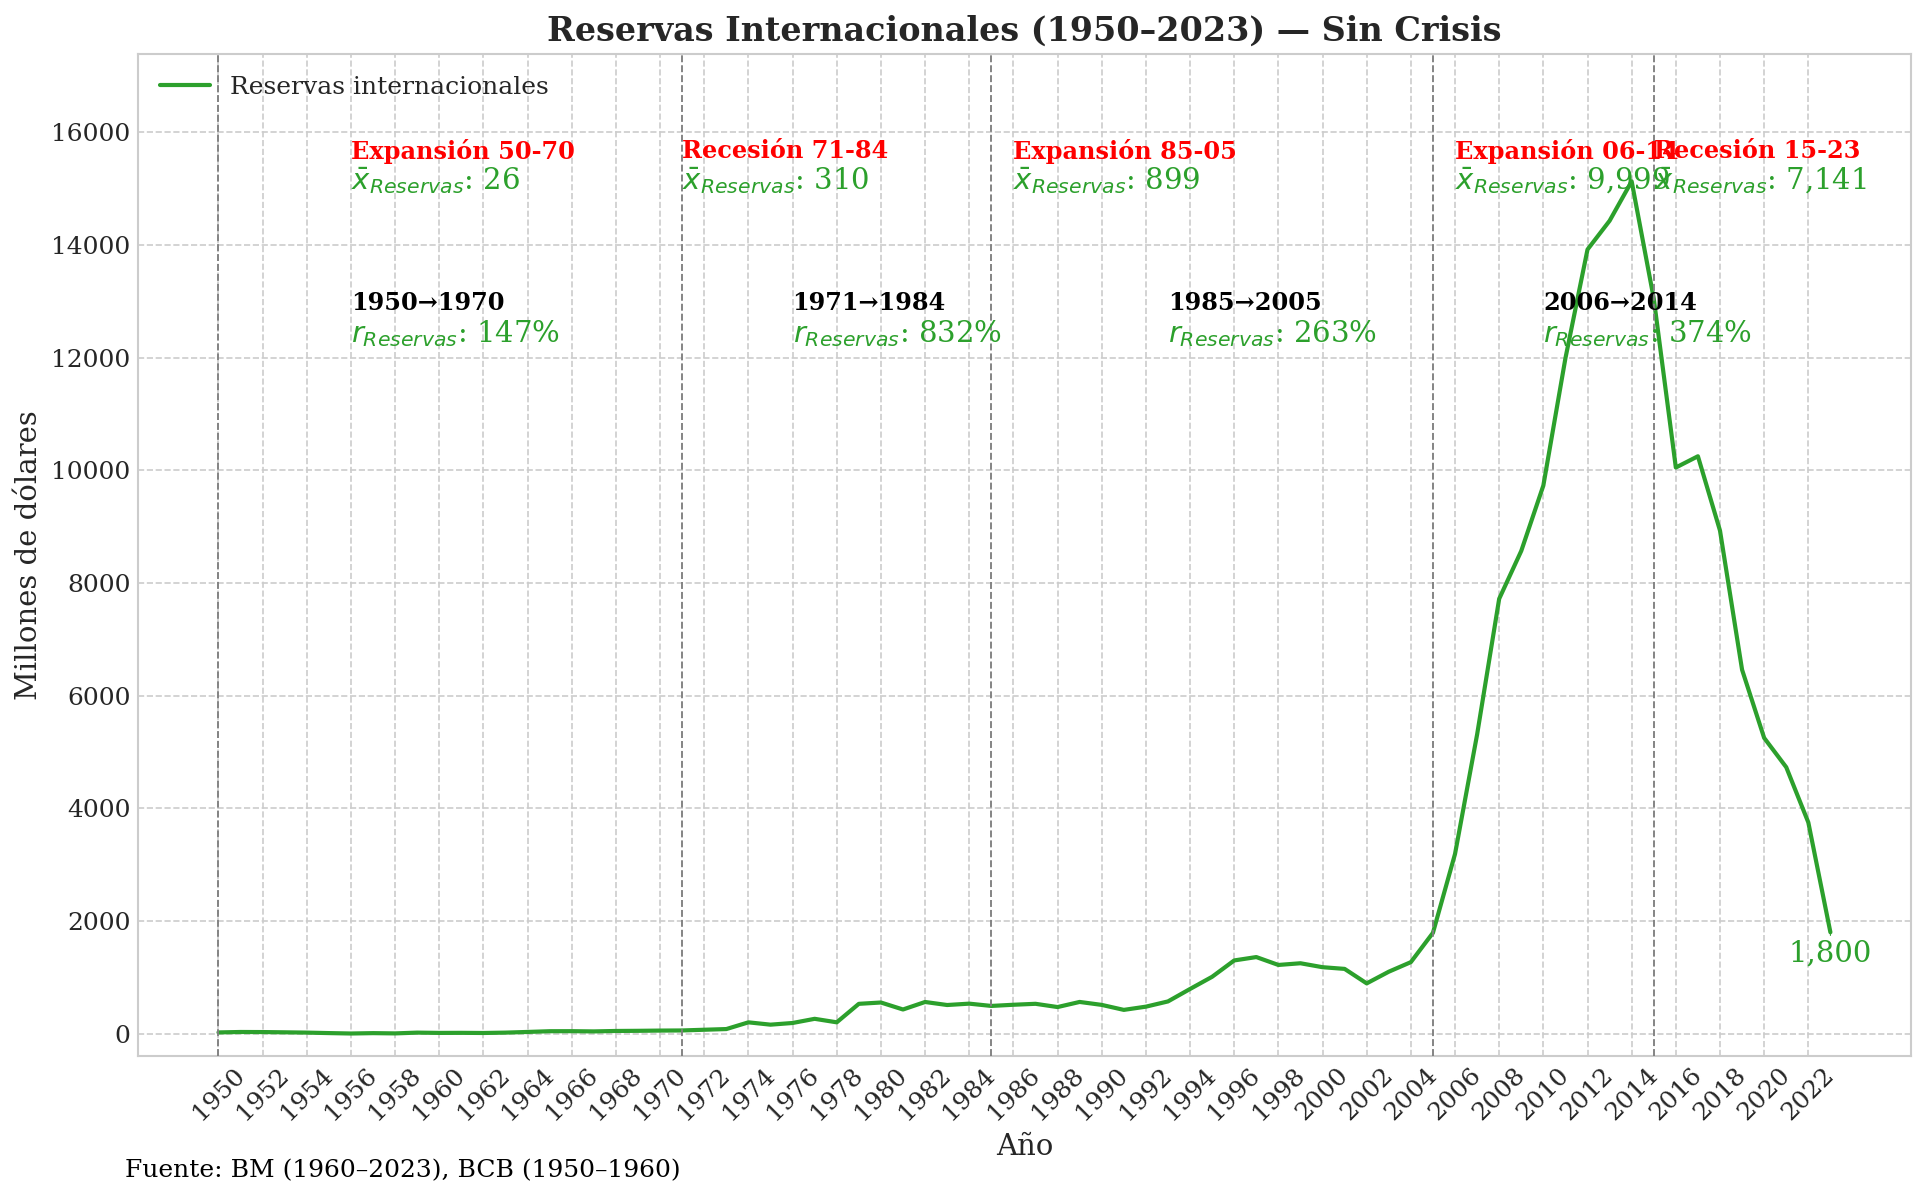

In [10]:
# ============================================================
# 2) SIN CRISIS
# ============================================================
annotate_years_sin_crisis = adjust_annot_years(df_res, annot_years_sin_crisis)
cycles_stats_sin_crisis   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                             for n, s in adjust_cycles(df_res, CYCLES_SIN_CRISIS).items()}
periodos_sin_crisis       = adjust_periods(df_res, periodos_tasas_sin_crisis)

annotation_offsets_sin_crisis = {
    'reservas_totales': {
        1956: (0, -250), 1970: (0, -250), 1986: (0, -270),
        2006: (0, -320), 2014: (0, -350), 2023: (0, -380),
    }
}

hitos_offset_sin_crisis   = {a: 0.8 for a in hitos_v_sin_crisis}
medias_offsets_sin_crisis = {
    'Expansión 50-70': (1956, 1),
    'Recesión 71-84':  (1971, 1),
    'Expansión 85-05': (1986, 1),
    'Expansión 06-14': (2006, 1),
    'Recesión 15-23':  (2015, 1),
}

tasas_offsets_sin_crisis  = {
    '1950-1970': (1956, 0.83),
    '1971-1984': (1976, 0.83),
    '1985-2005': (1993, 0.83),
    '2006-2014': (2010, 0.83),
    '2015-2022': (2018, 0.65),
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Sin Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v_sin_crisis, hitos_offset_sin_crisis, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats_sin_crisis, medias_offsets_sin_crisis,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years_sin_crisis, cols_componentes,
                           annotation_offsets_sin_crisis, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_res, periodos_sin_crisis, cols_componentes,
                                    tasas_offsets_sin_crisis, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_sin_crisis.png"))
plt.show()
plt.close()

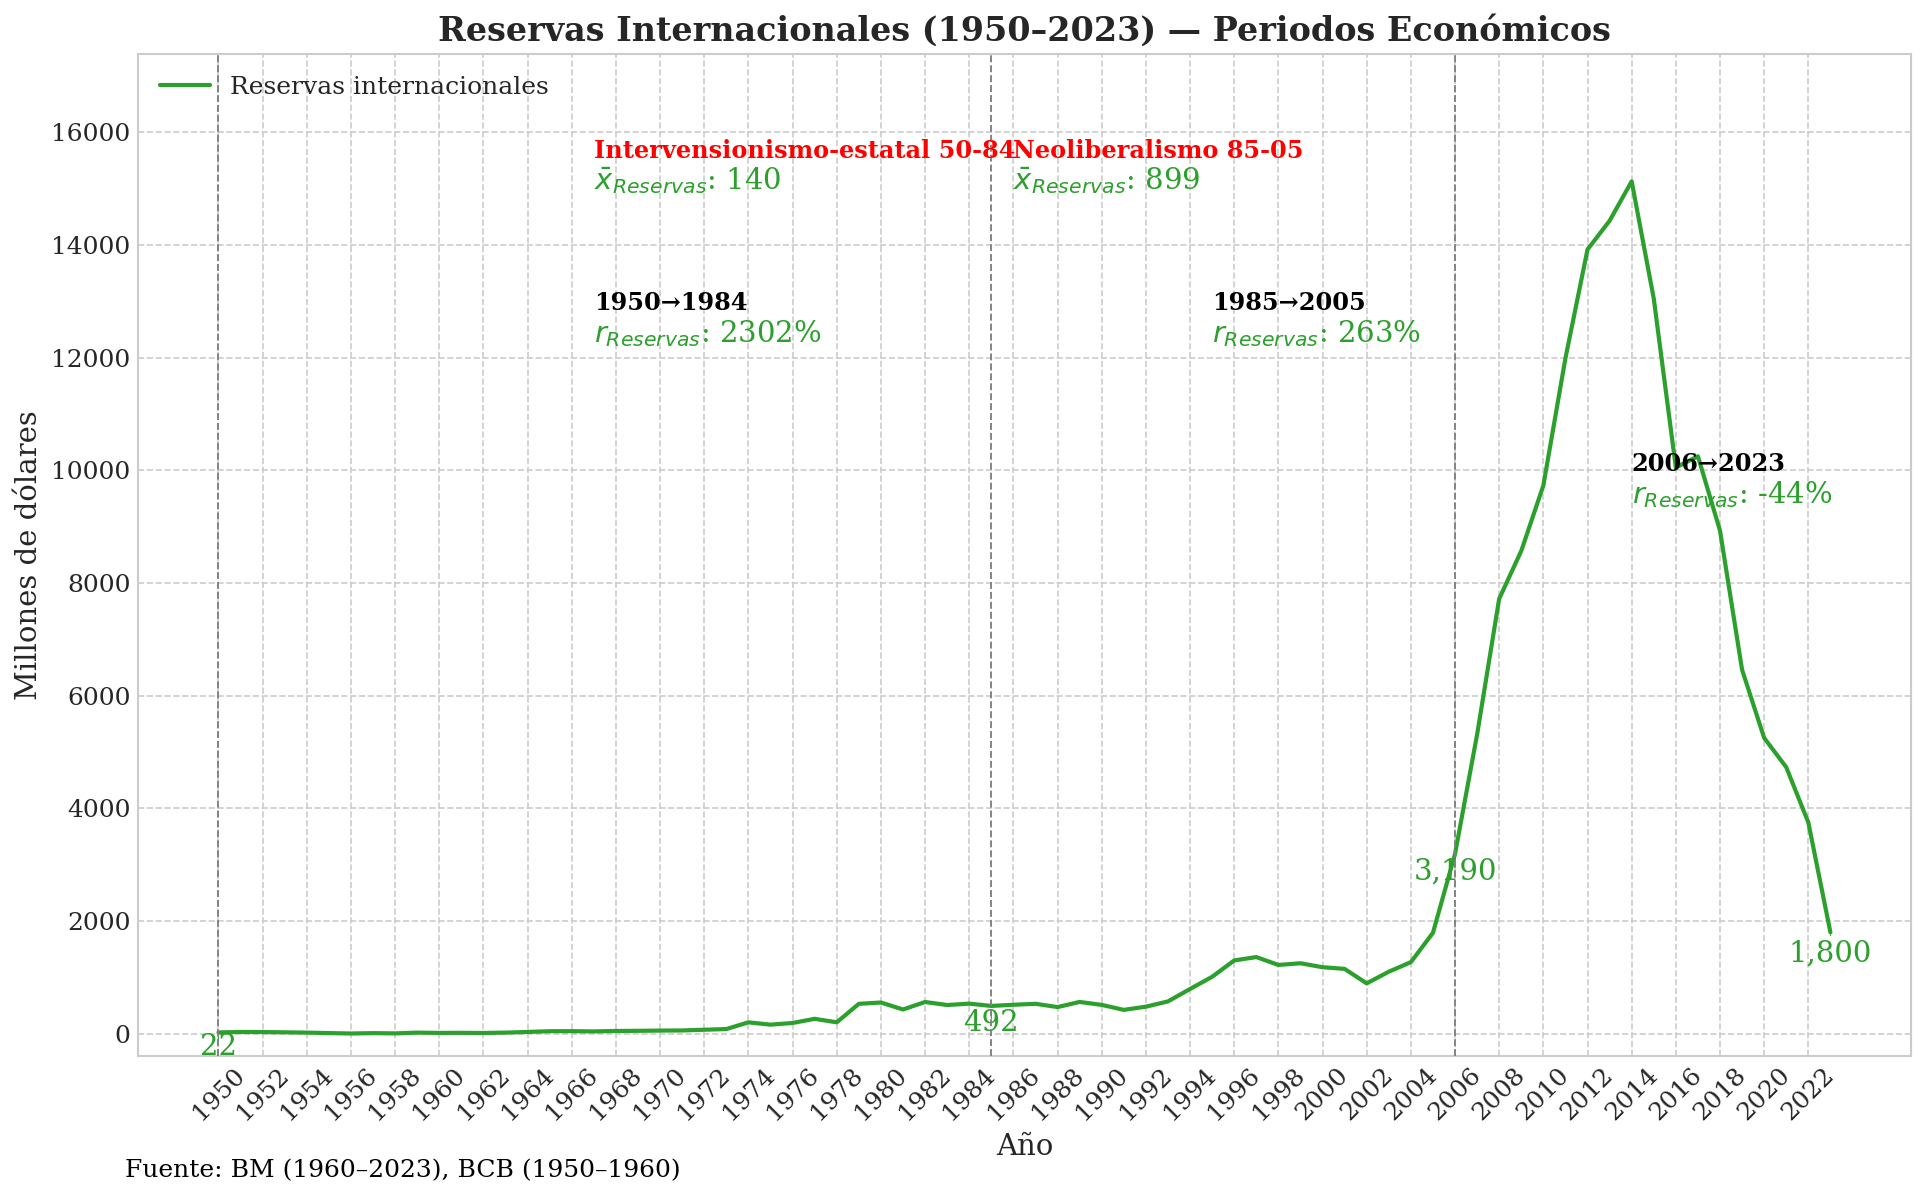

In [13]:
# ============================================================
# 3) PERIODOS ESTRUCTURALES
# ============================================================
annotate_years_periodos = adjust_annot_years(df_res, annot_years_periodos)
cycles_stats_periodos   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                           for n, s in adjust_cycles(df_res, CYCLES_PERIODOS).items()}
periodos_periodos       = adjust_periods(df_res, periodos_tasas_periodos)

annotation_offsets_periodos = {
    'reservas_totales': {
        1950: (0, -250), 1985: (0, -300), 2006: (0, -320), 2023: (0, -380),
    }
}

hitos_offset_periodos   = {a: 0.8 for a in hitos_v_periodos}
medias_offsets_periodos = {
    'Intervensionismo-estatal 50-84': (1967, 1),
    'Neoliberalismo 85-05':   (1986, 1),
    'Neodesarrollismo 06-24': (2006, 1),
}

tasas_offsets_periodos  = {
    '1950-1984': (1967, 0.83),
    '1985-2005': (1995, 0.83),
    '2006-2023': (2014, 0.65),
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Periodos Económicos",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v_periodos, hitos_offset_periodos, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats_periodos, medias_offsets_periodos,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years_periodos, cols_componentes,
                           annotation_offsets_periodos, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_res, periodos_periodos, cols_componentes,
                                    tasas_offsets_periodos, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_periodos.png"))
plt.show()
plt.close()